In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
dataset = pd.read_pickle('df_FinalDataset.csv')

In [3]:
dataset.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporas

In [4]:
# Define columns to be removed
remove_these_columns = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'AttendingPhysician',
                        'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
                        'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                        'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                        'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                        'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
                        'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
                        'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode',
                        ]

In [5]:
# Remove unnecessary columns
Train_category_removed = dataset.drop(axis=0, columns=remove_these_columns)

In [6]:
# Define features (X) and target variable (Y)
X_df = Train_category_removed[['InscClaimAmtReimbursed','OPAnnualDeductibleAmt',
                               'IPAnnualDeductibleAmt', 'IPAnnualReimbursementAmt', 
                               'OPAnnualReimbursementAmt', 'State', 'County']]

In [7]:
Y_df = Train_category_removed['PotentialFraud']

In [8]:
# Convert 'Yes' and 'No' to 1 and 0
Y_df.replace(['Yes', 'No'], [1, 0], inplace=True)

In [9]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=101)

In [10]:
# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=69)

In [11]:
# Define hyperparameters for Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [12]:
# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)

In [13]:
# Fit the model
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=69), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [14]:
# Get the best parameters
best_params = grid_search.best_params_

In [15]:
# Use the best parameters to create a new model
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=69)

In [16]:
# Fit the new model
best_dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=10,
                       random_state=69)

In [17]:
# Predict on the test set
y_pred = best_dt_classifier.predict(X_test)

In [18]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
class_rep = classification_report(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)

In [19]:
print("Best Hyperparameters:", best_params)
print("\nAccuracy:", round(accuracy * 100, 2))
print("F1 Score:", round(f1 * 100, 2))
print("\nClassification Report:\n", class_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}

Accuracy: 75.8
F1 Score: 67.05

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81    103529
           1       0.70      0.64      0.67     63935

    accuracy                           0.76    167464
   macro avg       0.74      0.74      0.74    167464
weighted avg       0.76      0.76      0.76    167464


Confusion Matrix:
 [[85716 17813]
 [22708 41227]]


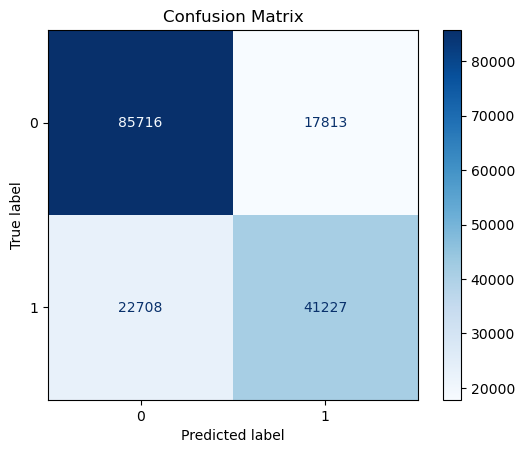

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_dt_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [21]:
#---Adding Feature Engineering features---

In [22]:
# Convert 'Dead_Alive' to 1 and 0
Train_category_removed['Dead_Alive'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [23]:
# Define features (X) and target variable (Y)
X_df = Train_category_removed[['InscClaimAmtReimbursed','Claim_Duration', 'Att_Phy_tot_claims', 'OPAnnualDeductibleAmt',
                               'IPAnnualDeductibleAmt', 'IPAnnualReimbursementAmt', 
                               'OPAnnualReimbursementAmt', 'State', 'County', 'Dead_Alive']]

In [24]:
# Convert 'Yes' and 'No' to 1 and 0
Y_df.replace(['Yes', 'No'], [1, 0], inplace=True)

In [25]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=101)

In [26]:
# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=69)

In [27]:
# Define hyperparameters for Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [28]:
# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)

In [29]:
# Fit the model
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=69), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [30]:
# Get the best parameters
best_params = grid_search.best_params_

In [31]:
# Use the best parameters to create a new model
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=69)

In [32]:
# Fit the new model
best_dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                       random_state=69)

In [33]:
# Predict on the test set
y_pred = best_dt_classifier.predict(X_test)

In [34]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
class_rep = classification_report(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)

In [35]:
print("Best Hyperparameters:", best_params)
print("\nAccuracy:", round(accuracy * 100, 2))
print("F1 Score:", round(f1 * 100, 2))
print("\nClassification Report:\n", class_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}

Accuracy: 87.35
F1 Score: 82.04

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90    103529
           1       0.90      0.76      0.82     63935

    accuracy                           0.87    167464
   macro avg       0.88      0.85      0.86    167464
weighted avg       0.88      0.87      0.87    167464


Confusion Matrix:
 [[97927  5602]
 [15576 48359]]


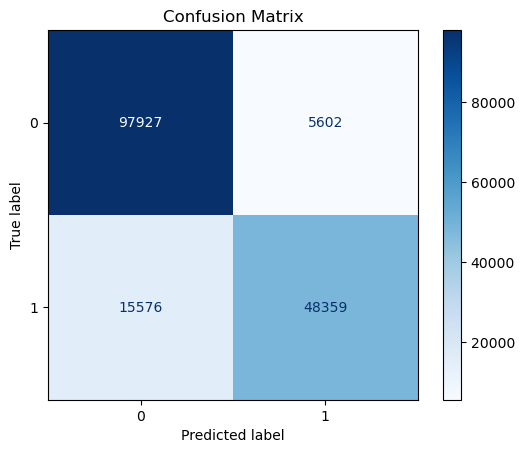

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_dt_classifier.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.title('Confusion Matrix')
plt.show()